In [140]:
%matplotlib inline
from matplotlib import pyplot as plt

In [141]:
import os
import sys
sys.path.append('..')
from chessvision.util import *
os.environ[STORAGE_ENV] = "/home/calum/Documents/uni/chess-vision/games"
from chessvision.game import *
from chessvision.label import *

## Load Game

In [385]:
game = Game("Kasparov", 0)
# game = Game("poop", 0)
moves = list(game.images)
len(moves)

84

**Careful running the following block**

In [386]:
# with open(f"{Storage.dir}/{game.pkl_file}", "rb") as pkl_wb_obj:
#     recorded_moves = pickle.load(pkl_wb_obj)

# overwrite = [moves[5], *moves[8:]]
# overwrite = moves[7:]

# with open(f"/home/calum/Documents/uni/chess-vision/games/poop_0.pkl", "wb") as pkl_wb_obj:
#     for move in overwrite:
#         pickle.dump(move, pkl_wb_obj)

## Visualise Game

In [392]:
margin = 0
move = 2

(<matplotlib.image.AxesImage at 0x7f6001bcb940>,)

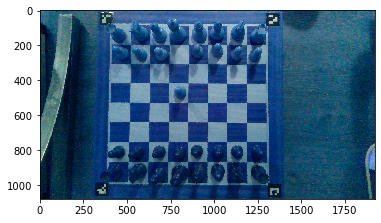

In [393]:
img = moves[move]["color"]
plt.imshow(img, interpolation='nearest'),

In [394]:
corners = find_corners(game.images)
corners

array([[ 391.74734,  983.5767 ],
       [1304.7764 ,  990.533  ],
       [ 414.30853,   86.03298],
       [1297.0002 ,   89.06176]], dtype=float32)

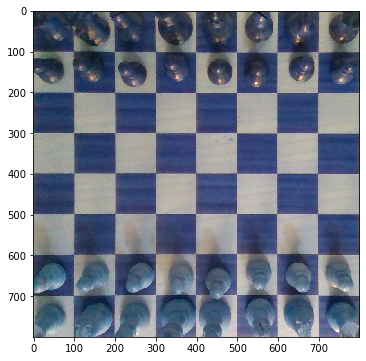

In [291]:
board = get_board(img, corners, game.options)
plt.figure(figsize=(6,6))
plt.imshow(board, interpolation='nearest')
plt.show()

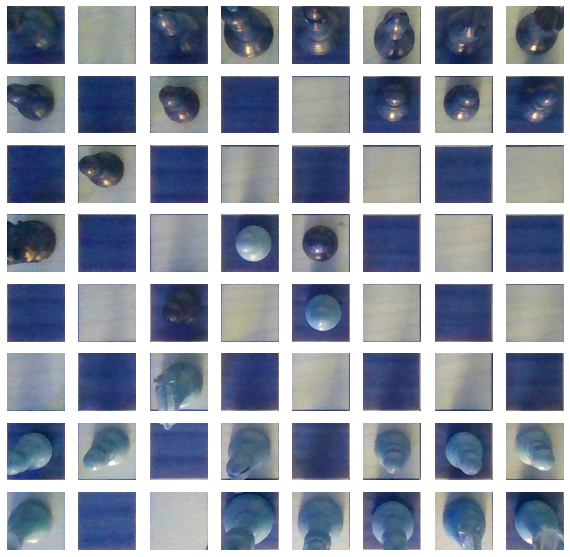

In [148]:
plt.figure(figsize=(10,10))
for i, square in enumerate(get_squares(board, game.options)):
    plt.subplot(8, 8, 64-i)
    plt.imshow(square)
    plt.axis("off")

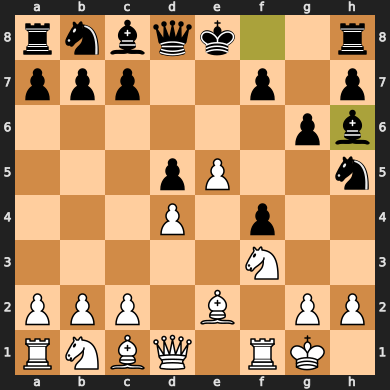

In [149]:
list(iter(game.pgn.mainline()))[move-2].board()

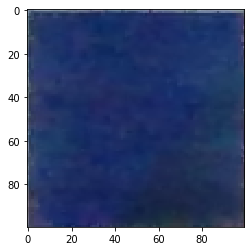

In [150]:
pgn_move = list(iter(game.pgn.mainline()))[move-2]
piece_img, piece = label_move(pgn_move.board(), board, pgn_move.move.to_square, opts=game.options)
plt.imshow(piece_img, interpolation='nearest')
plt.show()

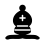

In [151]:
piece